In [68]:
# Set the process name to be human readable in htop
import setproctitle
setproctitle.setproctitle("Prep_Figure_S4")

import requests
import pandas as pd
pd.options.display.max_columns = 999

import numpy as np
import helper as my

import glob
import os
import sys

from tqdm import tqdm, tqdm_notebook
from tqdm._tqdm_notebook import tqdm_notebook

tqdm.pandas(tqdm_notebook)
tqdm_notebook.pandas()


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from collections import defaultdict
import math

In [69]:
pop_vars = pd.read_csv("../../Data/Pop_Vars.txt", sep="\t")
ires_df = pd.read_csv("../../Data/Interface_Summary.txt", sep="\t")
ires_df = ires_df.drop_duplicates(["P1", "P2"])
ires_df["Source"].value_counts()

s1 = set(ires_df["P2"].to_list())
pop_vars = pop_vars[pop_vars["UniProt"].isin(s1)]

[REDACTED_PATH]/.conda/envs/jp/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
from collections import defaultdict
uni2ires = defaultdict(set)
uni2ires.update(ires_df.set_index("P2")["P2_Ires"].map(lambda x: set([int(y) for y in x.split(",")]) if type(x) == str else []).to_dict())
pop_vars["Is_Ires"] = pop_vars[["UniProt", "AA_Pos"]].apply(lambda x: x[1] in uni2ires[x[0]], axis=1)

[REDACTED_PATH]/.conda/envs/jp/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
[REDACTED_PATH]/.conda/envs/jp/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
[REDACTED_PATH]/.conda/envs/jp/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.70619959e+00,   2.57011725e+00,
          1.60040726e-01,   1.18041967e+00,   4.43770979e-01,
          2.19459425e-01,   5.82971412e-01,   2.07209787e-01,
          3.03377400e-01,   1.73006252e-01,   1.35223277e-01,
          1.25280389e-01,   9.42585787e-02,   7.78726992e-02,
          5.44870265e-02,   4.62145437e-02,   3.79420608e-02,
          3.07036383e-02,   2.44992762e-02,   2.25902417e-02,
          2.01244054e-02,   1.42382157e-02,   1.39995864e-02,
          1.32836984e-02,   8.98837080e-03,   7.63613802e-03,
          8.03385355e-03,   5.24984489e-03,   5.01121558e-03,
          4.29532764e-03,   3.81806901e-03,   3.02263797e-03,
          2.70446555e-03,   2.46583624e-03,   1.90903451e-03,
          1.19314657e-03,   2.06812071e-03,   3.34081039e-03,
          2.38629313e-03,   1.82949140e-03,   1.98857761e-03,
          1.59086209e-03,   7.15887940e-04,   3.73852591e-03,
        

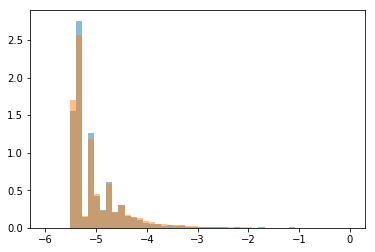

In [71]:
ires_AFs = pop_vars[pop_vars["Is_Ires"]]["gnomAD_AF"].map(lambda x: np.log10(x)).values
ires_AFs = [x for x in ires_AFs if x >= -10]
other_AFs = pop_vars[~pop_vars["Is_Ires"]]["gnomAD_AF"].map(lambda x: np.log10(x)).values
other_AFs = [x for x in other_AFs if x >= -10]
plt.hist(ires_AFs, range=(-6, 0), alpha=0.5, normed=True, bins=50)
plt.hist(other_AFs, range=(-6, 0), alpha=0.5, normed=True, bins=50)

In [72]:
import seaborn as sn

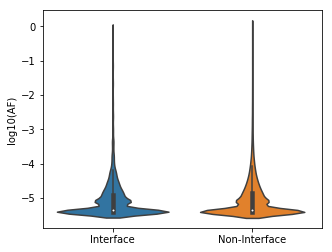

In [140]:
plt.figure(figsize=(5, 4))
sn.violinplot(data = [ires_AFs, other_AFs], bw=0.15)
plt.ylabel("log10(AF)")
plt.xticks([0, 1], ["Interface", "Non-Interface"])
plt.savefig("a.svg")

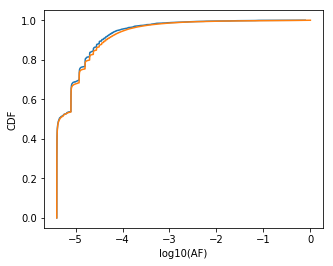

In [143]:
plt.figure(figsize=(5, 4))
ires_percentiles = [(i+1)/float(len(ires_AFs)) for i in range(len(ires_AFs))]
other_percentiles = [(i+1)/float(len(other_AFs)) for i in range(len(other_AFs))]
plt.plot(sorted(ires_AFs), ires_percentiles)
plt.plot(sorted(other_AFs), other_percentiles)
plt.xlabel("log10(AF)")
plt.ylabel("CDF")
plt.savefig("b.svg")

In [82]:
import scipy

In [83]:
scipy.stats.ks_2samp(ires_AFs, other_AFs)

Ks_2sampResult(statistic=0.021411800947682802, pvalue=0.18503306275420076)

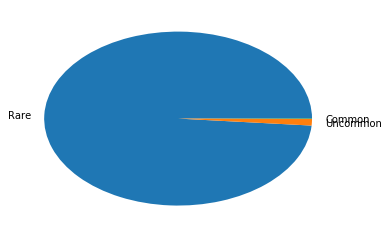

([<matplotlib.patches.Wedge at 0x7f57149e1950>,
 [Text(-1.09892,0.048737,'Rare'),
  Text(1.09858,-0.0558209,'Uncommon'),
  Text(1.09998,-0.00709188,'Common')])

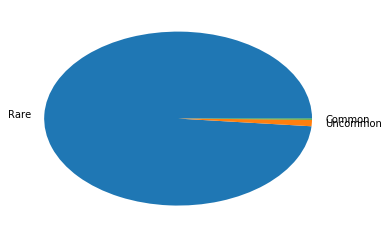

In [84]:
ires_AF_cats = pd.Series(["Common" if x >= -1 else "Uncommon" if x >= -3 else "Rare" for x in ires_AFs]).value_counts()
other_AF_cats = pd.Series(["Common" if x >= -1 else "Uncommon" if x >= -3 else "Rare" for x in other_AFs]).value_counts()
plt.pie(ires_AF_cats, labels=ires_AF_cats.keys())
plt.show()
plt.pie(other_AF_cats, labels=other_AF_cats.keys())

(array([ 16.74089223,   4.65592861,   3.14409336,   2.41775329,
          2.00620283,   1.68211741,   1.46197595,   1.23803166,
          1.14507365,   1.03267897,   0.90211522,   0.78295995,
          0.74493168,   0.69169209,   0.65873425,   0.59493125,
          0.57718472,   0.55267761,   0.53112826,   0.48338164,
          0.46563511,   0.40098705,   0.38366305,   0.35112775,
          0.33000093,   0.33253615,   0.35028268,   0.31352201,
          0.28985997,   0.27802895,   0.26873315,   0.22647951,
          0.22436683,   0.20788791,   0.2797191 ,   0.09464815,
          0.18126812,   0.15929622,   0.1508455 ,   0.13563418,
          0.19690196,   0.05535227,   0.10309888,   0.10605664,
          0.08028192,   0.09042279,   0.1056341 ,   0.03633813,
          0.0777467 ,   1.67915966]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0

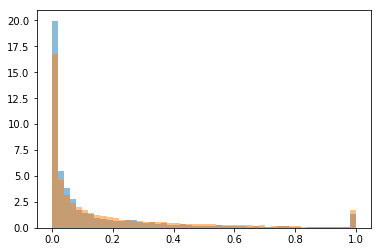

In [85]:
ires_SIFTs = pop_vars[pop_vars["Is_Ires"]]["SIFT_Score"]
ires_SIFTs = [x for x in ires_SIFTs if x >= -10]
other_SIFTs = pop_vars[~pop_vars["Is_Ires"]]["SIFT_Score"]
other_SIFTs = [x for x in other_SIFTs if x >= -10]
plt.hist(ires_SIFTs, range=(0, 1), alpha=0.5, normed=True, bins=50)
plt.hist(other_SIFTs, range=(0, 1), alpha=0.5, normed=True, bins=50)

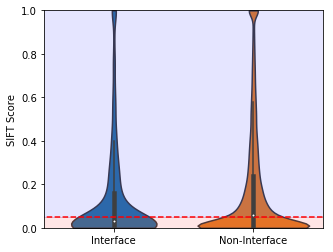

In [122]:
plt.figure(figsize=(5, 4))
sn.violinplot(data = [ires_SIFTs, other_SIFTs], cut=0)
plt.fill_between([-2, 2], [2, 2], y2=0.05, color="blue", alpha=0.1)
plt.fill_between([-2, 2], [0.05, 0.05], y2=0, color="red", alpha=0.1)
plt.plot([-2, 2], [0.05, 0.05], color="red", linestyle="--")
plt.xticks([0, 1], ["Interface", "Non-Interface"])
plt.ylabel("SIFT Score")
plt.ylim(0, 1)
plt.savefig("c.svg")

In [13]:
scipy.stats.ks_2samp(ires_SIFTs, other_SIFTs)

Ks_2sampResult(statistic=0.10181794291517932, pvalue=9.0452767219330673e-27)

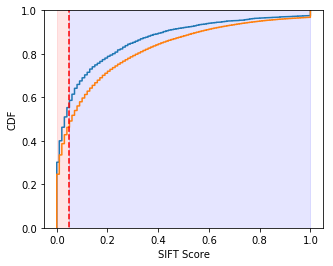

In [111]:
plt.figure(figsize=(5, 4))
ires_percentiles = [(i+1)/float(len(ires_SIFTs)) for i in range(len(ires_SIFTs))]
other_percentiles = [(i+1)/float(len(other_SIFTs)) for i in range(len(other_SIFTs))]
plt.plot(sorted(ires_SIFTs), ires_percentiles)
plt.plot(sorted(other_SIFTs), other_percentiles)
plt.fill_betweenx([-2, 2], [0.05, 0.05], x2=0, color="red", alpha=0.1)
plt.fill_betweenx([-2, 2], [1, 1], x2=0.05, color="blue", alpha=0.1)
plt.plot([0.05, 0.05], [-2, 2], color="red", linestyle="--")
plt.xlabel("SIFT Score")
plt.ylabel("CDF")
plt.ylim(0, 1)
plt.savefig("d.svg")

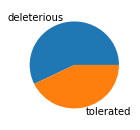

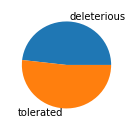

In [129]:
ires_sifts_cats = pop_vars[pop_vars["Is_Ires"]]["SIFT_Category"].value_counts()
other_sifts_cats = pop_vars[~pop_vars["Is_Ires"]]["SIFT_Category"].value_counts()
plt.figure(figsize=(2, 2))
plt.pie([ires_sifts_cats["deleterious"], ires_sifts_cats["tolerated"]], labels=["deleterious", "tolerated"])
plt.savefig("e1.svg")
plt.show()
plt.figure(figsize=(2, 2))
plt.pie([other_sifts_cats["deleterious"], other_sifts_cats["tolerated"]], labels=["deleterious", "tolerated"])
plt.savefig("e2.svg")

(array([ 13.49901134,   2.78979568,   1.68832705,   1.2180798 ,
          0.98865999,   0.84754356,   0.68699194,   0.61474371,
          0.58939345,   0.48841493,   0.46686722,   0.42165926,
          0.43348938,   0.46433219,   0.35997364,   0.32913082,
          0.32955333,   0.41870173,   0.3464535 ,   0.32237076,
          0.27843031,   0.28899292,   0.32870832,   0.3173007 ,
          0.27969782,   0.26110764,   0.2868804 ,   0.35532609,
          0.30842812,   0.25603759,   0.2868804 ,   0.31899072,
          0.31856822,   0.32321576,   0.32279326,   0.28983793,
          0.38447888,   0.31899072,   0.3861689 ,   0.41447669,
          0.4056041 ,   0.42461679,   0.48841493,   0.54629802,
          0.60544862,   0.65488161,   0.92190431,   1.11076372,
          1.87253891,   9.34072434]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0

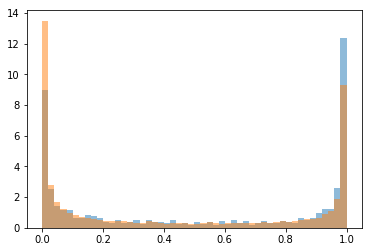

In [113]:
ires_PHs = pop_vars[pop_vars["Is_Ires"]]["PolyPhen_Score"]
ires_PHs = [x for x in ires_PHs if x >= -10]
other_PHs = pop_vars[~pop_vars["Is_Ires"]]["PolyPhen_Score"]
other_PHs = [x for x in other_PHs if x >= -10]
plt.hist(ires_PHs, range=(0, 1), alpha=0.5, normed=True, bins=50)
plt.hist(other_PHs, range=(0, 1), alpha=0.5, normed=True, bins=50)

In [118]:
pop_vars[pop_vars["PolyPhen_Category"] == "probably_damaging"]["PolyPhen_Score"].describe()

count    33350.000000
mean         0.981243
std          0.023477
min          0.909000
25%          0.971000
50%          0.992000
75%          0.998000
max          1.000000
Name: PolyPhen_Score, dtype: float64

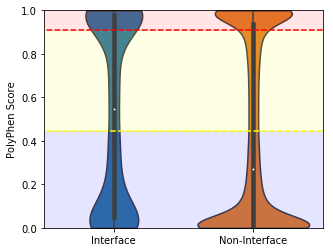

In [123]:
plt.figure(figsize=(5, 4))
sn.violinplot(data = [ires_PHs, other_PHs], cut=0)
plt.fill_between([-2, 2], [0.445], y2=0, color="blue", alpha=0.1)
plt.fill_between([-2, 2], [0.908, 0.908], y2=0.445, color="yellow", alpha=0.1)
plt.fill_between([-2, 2], [2, 2], y2=0.908, color="red", alpha=0.1)
plt.plot([-2, 2], [0.445, 0.445], color="yellow", linestyle="--")
plt.plot([-2, 2], [0.908, 0.908], color="red", linestyle="--")
plt.xticks([0, 1], ["Interface", "Non-Interface"])
plt.ylabel("PolyPhen Score")
plt.ylim(0, 1)
plt.savefig("f.svg")

In [18]:
scipy.stats.ks_2samp(ires_PHs, other_PHs)

Ks_2sampResult(statistic=0.10475478548482031, pvalue=2.5982493872277626e-28)

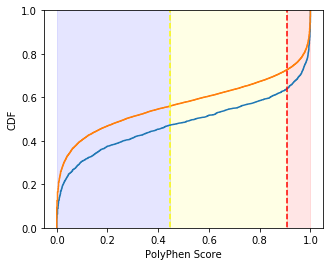

In [125]:
plt.figure(figsize=(5, 4))
ires_percentiles = [(i+1)/float(len(ires_PHs)) for i in range(len(ires_PHs))]
other_percentiles = [(i+1)/float(len(other_PHs)) for i in range(len(other_PHs))]
plt.plot(sorted(ires_PHs), ires_percentiles)
plt.plot(sorted(other_PHs), other_percentiles)
plt.fill_betweenx([-2, 2], [0.445, 0.445], x2=0, color="blue", alpha=0.1)
plt.fill_betweenx([-2, 2], [0.908, 0.908], x2=0.445, color="yellow", alpha=0.1)
plt.fill_betweenx([-2, 2], [1, 1], x2=0.908, color="red", alpha=0.1)
plt.plot([0.445, 0.445], [-2, 2], color="yellow", linestyle="--")
plt.plot([0.908, 0.908], [-2, 2], color="red", linestyle="--")
plt.xlabel("PolyPhen Score")
plt.ylabel("CDF")
plt.ylim(0, 1)
plt.savefig("g.svg")

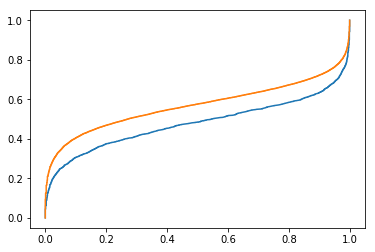

In [20]:
pop_vars["SIFT_Score"].max()

1.0

In [21]:
pop_vars

,Gene_Symbol,Gene_ID,UniProt,Chrom,Pos,Ref,Alt,Consequence,rsID,Imact,AA_Pos,AA_Ref,AA_Alt,SIFT_Category,SIFT_Score,PolyPhen_Category,PolyPhen_Score,gnomAD_AF,Clinical_Significance,Somatic,Pheno,Is_Ires
0,PUSL1,ENSG00000169972,Q8N0Z8,1,1244031,C,T,missense_variant,rs749556442,MODERATE,3,S,L,tolerated_low_confidence,0.39,benign,0.000,0.000014,-,-,-,False
1,PUSL1,ENSG00000169972,Q8N0Z8,1,1244033,G,C,missense_variant,rs1212000768,MODERATE,4,A,P,tolerated_low_confidence,0.17,benign,0.012,0.000014,-,-,-,False
2,PUSL1,ENSG00000169972,Q8N0Z8,1,1244034,C,T,missense_variant,rs368548181,MODERATE,4,A,V,tolerated_low_confidence,0.20,benign,0.000,0.000007,-,-,-,False
3,PUSL1,ENSG00000169972,Q8N0Z8,1,1244037,C,G,missense_variant,rs1485192589,MODERATE,5,P,R,tolerated_low_confidence,0.22,benign,0.013,0.000007,-,-,-,False
4,PUSL1,ENSG00000169972,Q8N0Z8,1,1244039,G,A,missense_variant,rs779148624,MODERATE,6,A,T,deleterious_low_confidence,0.03,benign,0.055,0.000013,-,-,-,False
5,PUSL1,ENSG00000169972,Q8N0Z8,1,1244039,G,C,missense_variant,rs779148624,MODERATE,6,A,P,tolerated_low_confidence,0.08,benign,0.228,NaN,-,-,-,False
6,PUSL1,ENSG00000169972,Q8N0Z8,1,1244045,G,A,missense_variant,rs746879486,MODERATE,8,G,S,deleterious,0.04,benign,0.077,0.000019,-,-,-,False
7,PUSL1,ENSG00000169972,Q8N0Z8,1,1244046,G,A,missense_variant,rs770842424,MODERATE,8,G,D,tolerated,0.07,benign,0.001,0.000006,-,-,-,False
8,PUSL1,ENSG00000169972,Q8N0Z8,1,1244048,T,A,missense_variant,rs776472630,MODERATE,9,S,T,deleterious,0.05,benign,0.124,0.000006,-,-,-,False
9,PUSL1,ENSG00000169972,Q8N0Z8,1,1244049,C,T,missense_variant,rs745698070,MODERATE,9,S,F,deleterious,0.01,possibly_damaging,0.502,0.000006,-,"0,1","0,1",False


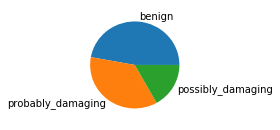

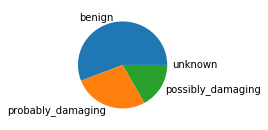

In [126]:
ires_ph_cats = pop_vars[pop_vars["Is_Ires"]]["PolyPhen_Category"].value_counts()
other_ph_cats = pop_vars[~pop_vars["Is_Ires"]]["PolyPhen_Category"].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(ires_ph_cats.values, labels=ires_ph_cats.keys())
plt.savefig("h1.svg")
plt.show()
plt.figure(figsize=(2, 2))
plt.pie(other_ph_cats.values, labels=other_ph_cats.keys())
plt.savefig("h2.svg")

In [132]:
other_ph_cats

benign               66202
probably_damaging    32275
possibly_damaging    19862
unknown                  3
Name: PolyPhen_Category, dtype: int64

In [131]:
ires_sifts_cats

deleterious                   1673
tolerated                     1252
tolerated_low_confidence        35
deleterious_low_confidence      26
Name: SIFT_Category, dtype: int64

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [18]:
import numpy as np

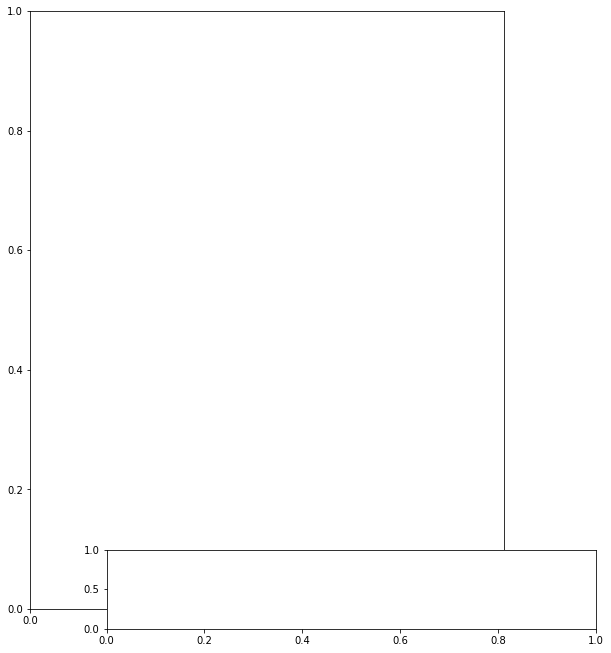

In [52]:
fig = plt.figure(figsize=(8.5, 11))
colors = ["MediumOrchid", "ForestGreen", "DarkOrange"]

from matplotlib.gridspec import GridSpec
gs = GridSpec(1100*2, 850*2)

def add_subplot(fig, gs, x, y, width, height, spacing=0.5, border=2):
    x = int(np.round(border*100 + spacing*100 + x*100))
    y = int(np.round(border*100 + spacing*100 + y*100))
    x2 = int(np.round(x + width*100 - 2*spacing*100))
    y2 = int(np.round(y + height*100 - 2*spacing*100))
    
    print x, x2, y, y2
    print width, height
    print "____"
    ax = fig.add_subplot(gs[y:y2, x:x2])
    return ax
# FUNCTION END

fig.add_subplot(gs[:, :])
#a = add_subplot(fig, gs, 1.5, 0, 5, 4)
#b = add_subplot(fig, gs, 6.5, 0, 5, 4)
#c = add_subplot(fig, gs, 0, 4, 5, 4)
#d = add_subplot(fig, gs, 5, 4, 5, 4)
#e1 = add_subplot(fig, gs, 10.5, 4, 2, 2)
#e2 = add_subplot(fig, gs, 10.5, 6, 2, 2)
#e1.pie([20, 25, 40], labels=["A", "B", "C"])
#e2.pie([20, 25, 40], labels=["A", "B", "C"])
fig.add_axes([0.25, 0.1, 0.8, 0.1])

0.264705882353 0.136363636364 0.235294117647 0.136363636364
0.235294117647 0.136363636364
____
0.558823529412 0.136363636364 0.235294117647 0.136363636364
0.235294117647 0.136363636364
____
0.176470588235 0.318181818182 0.235294117647 0.136363636364
0.235294117647 0.136363636364
____
0.470588235294 0.318181818182 0.235294117647 0.136363636364
0.235294117647 0.136363636364
____
0.794117647059 0.318181818182 0.0588235294118 0.0454545454545
0.0588235294118 0.0454545454545
____
0.794117647059 0.409090909091 0.0588235294118 0.0454545454545
0.0588235294118 0.0454545454545
____


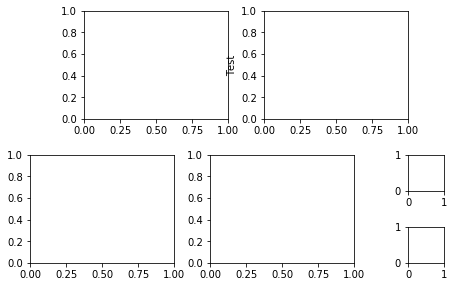

In [67]:
fig = plt.figure(figsize=(8.5, 11))
colors = ["MediumOrchid", "ForestGreen", "DarkOrange"]

from matplotlib.gridspec import GridSpec
gs = GridSpec(1100*2, 850*2)

def add_subplot(fig, gs, x, y, width, height, spacing=1, border=2):
    x = (x + border + spacing) / (8.5*2)
    y = (y + border + spacing) / (11.0*2)
    width = (width - spacing) / (8.5*2)
    height = (height - spacing) / (11.0*2)
    
    print x, y, width, height
    print width, height
    print "____"
    ax = fig.add_axes([x, 1 - y - height, width, height])
    return ax
# FUNCTION END

#fig.add_subplot(gs[:, :])
a = add_subplot(fig, gs, 1.5, 0, 5, 4)
b = add_subplot(fig, gs, 6.5, 0, 5, 4)
c = add_subplot(fig, gs, 0, 4, 5, 4)
d = add_subplot(fig, gs, 5, 4, 5, 4)
e1 = add_subplot(fig, gs, 10.5, 4, 2, 2)
e2 = add_subplot(fig, gs, 10.5, 6, 2, 2)
#e1.pie([20, 25, 40], labels=["A", "B", "C"])
#e2.pie([20, 25, 40], labels=["A", "B", "C"])
b.set_ylabel("Test")
fig.tight_layout()

In [ ]:
a = fig.add_subplot(gs[200:600, 350:850, ])
b = fig.add_subplot(gs[200:600, 850:1350, ])
c = fig.add_subplot(gs[600:1000, 200:700, ])
d = fig.add_subplot(gs[600:1000, 700:1200,])
e1 = fig.add_subplot(gs[600:800, 1200:1500,])
e2 = fig.add_subplot(gs[800:1000, 1200:1500,])

([<matplotlib.patches.Wedge at 0x7f5746a2fb90>,
 [Text(0.81291,0.741065,'A'),
  Text(-0.81291,0.741065,'B'),
  Text(0.101495,-1.09531,'C')])

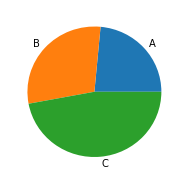

In [37]:
plt.figure(figsize=(3, 3))
plt.pie([20, 25, 40], labels=["A", "B", "C"])